In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


training_images = np.load("D:\Training_data/train_images.npy")
training_labels = np.load("D:\Training_data/train_labels.npy")
testing_images = np.load ("D:\Training_data/test_images.npy")
test_labels = np.load("D:\Training_data/test_labels.npy")

In [14]:
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(test_labels.shape)


(28709, 48, 48)
(28709,)
(7178, 48, 48)
(7178,)


In [1]:
label_names = ['','angry','disgust','fear','happy','neutral','sad','surprise']
print(label_names)

['', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


label =  happy


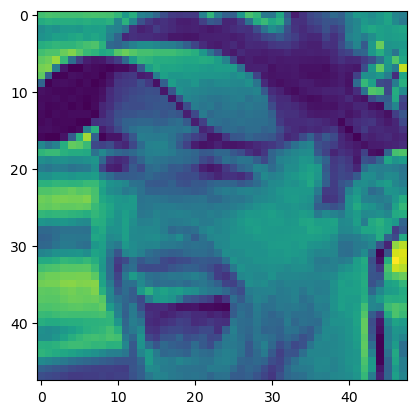

In [17]:
plt.imshow(training_images[14000])
print("label = ",label_names[training_labels[14000]])

label =  angry


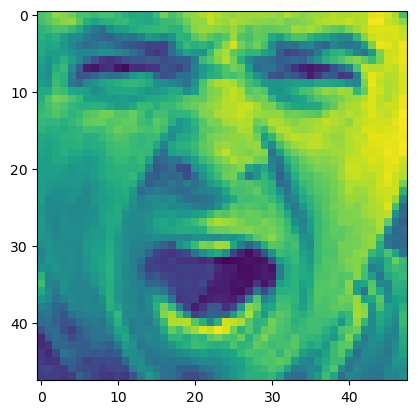

In [18]:
plt.imshow(training_images[1400])
print("label = ",label_names[training_labels[1400]])

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming your image data has the shape (height, width, channels)
image_height = 28
image_width = 28
num_channels = 1

# Assuming the number of classes (output categories) in your dataset
num_classes = 10

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 128)        

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the data
training_images = np.load("D:\Training_data/train_images.npy")
training_labels = np.load("D:\Training_data/train_labels.npy")
testing_images = np.load("D:\Training_data/test_images.npy")
test_labels = np.load("D:\Training_data/test_labels.npy")

# Normalize the images to values between 0 and 1
training_images = training_images / 255.0
testing_images = testing_images / 255.0

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(7, activation='softmax')  # 7 classes for the emotions
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Reshape the training and testing data to include a single channel (grayscale)
training_images = training_images.reshape(training_images.shape[0], 48, 48, 1)
testing_images = testing_images.reshape(testing_images.shape[0], 48, 48, 1)

# Ensure that the label values are within the valid range [0, 6]
training_labels = np.clip(training_labels, 0, 6)
test_labels = np.clip(test_labels, 0, 6)

# Train the model
model.fit(training_images, training_labels, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(testing_images, test_labels)
print("Test accuracy:", test_accuracy)


Epoch 1/5
718/718 [==============================] - 51s 70ms/step - loss: 1.4958 - accuracy: 0.3956 - val_loss: 2.0730 - val_accuracy: 0.0188
Epoch 2/5
718/718 [==============================] - 49s 68ms/step - loss: 1.2784 - accuracy: 0.5027 - val_loss: 2.6783 - val_accuracy: 0.0051
Epoch 3/5
718/718 [==============================] - 51s 71ms/step - loss: 1.1814 - accuracy: 0.5450 - val_loss: 2.3702 - val_accuracy: 0.0394
Epoch 4/5
718/718 [==============================] - 52s 73ms/step - loss: 1.1126 - accuracy: 0.5747 - val_loss: 2.8751 - val_accuracy: 0.0143
Epoch 5/5
225/225 [==============================] - 6s 27ms/step - loss: 1.4608 - accuracy: 0.4492
Test accuracy: 0.4491501748561859


In [34]:
model.save(r"C:\Users\pc\Downloads\emotion_detection_model.h5")

# Print a message indicating that the model has been saved
print("Model saved successfully.")

Model saved successfully.


C:\Users\pc\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


225/225 [==============================] - 6s 24ms/step - loss: 2.1400 - accuracy: 0.2678
Test Accuracy: 0.26776260137557983
225/225 [==============================] - 6s 24ms/step


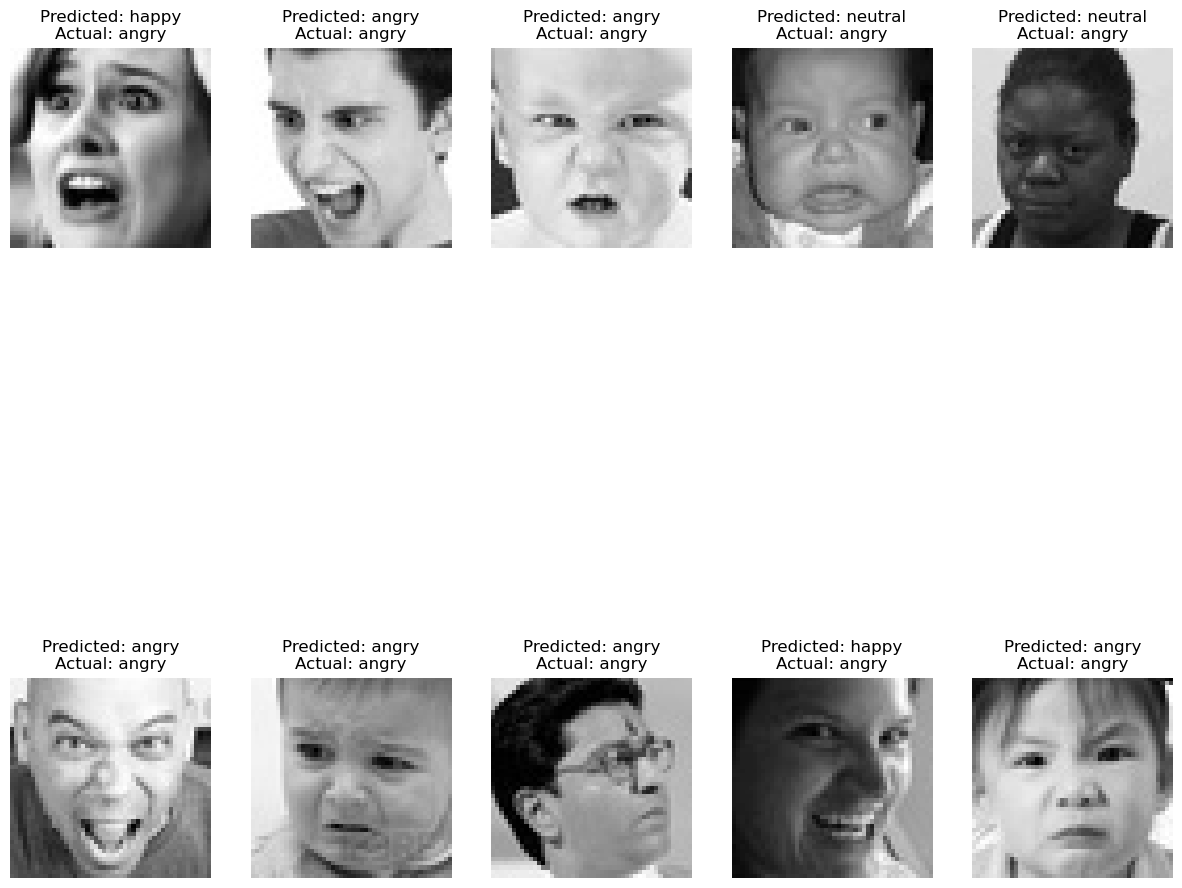

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the test data (if not already loaded)
testing_images = np.load("D:\Training_data/test_images.npy")
test_labels = np.load("D:\Training_data/test_labels.npy")

# Normalize the images to values between 0 and 1
testing_images = testing_images / 255.0

# Reshape the testing data to include a single channel (grayscale)
testing_images = testing_images.reshape(testing_images.shape[0], 48, 48, 1)

# Ensure that the label values are within the valid range [0, 6]
test_labels = np.clip(test_labels, 0, 3)

# Load the trained model
loaded_model = load_model(r"C:\Users\pc\Downloads\emotion_detection_model.h5")

# Evaluate the model on the test set
test_loss, test_accuracy = loaded_model.evaluate(testing_images, test_labels)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
predicted_labels = loaded_model.predict(testing_images)
predicted_classes = np.argmax(predicted_labels, axis=1)

# Label names for emotions
label_names = ['', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Visualize some predictions
num_samples_to_visualize = 10
plt.figure(figsize=(15, 15))
for i in range(num_samples_to_visualize):
    plt.subplot(2, 5, i + 1)
    plt.imshow(testing_images[i].reshape(48, 48), cmap='gray')
    predicted_label = label_names[predicted_classes[i]]
    actual_label = label_names[test_labels[i]]
    plt.title(f"Predicted: {predicted_label}\nActual: {actual_label}")
    plt.axis('off')
plt.show()


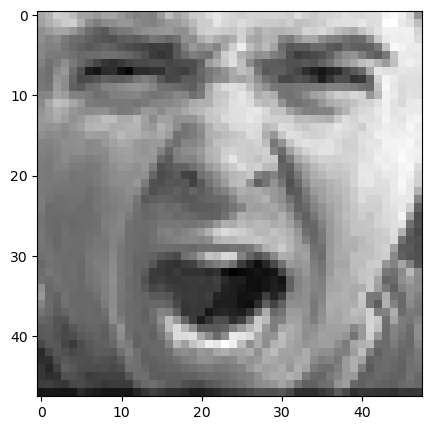

1/1 [==============================] - 0s 97ms/step
Predicted 1


In [51]:
# make a prediction for a new image.
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt
# load and prepare the image
def load_image(filename):
# load the image
    img = load_img(filename, grayscale=True, target_size=(48, 48))
    plt.figure(figsize=(5,5))
    plt.imshow(img,cmap='gray')
    plt.show()
# convert to array
    img = img_to_array(img)
# reshape into a single sample with 1 channel
    img = img.reshape(1, 48, 48, 1)
# prepare pixel data
    img = img.astype('float64')
    img = img / 255.0
    return img
# load an image and predict the class
def run_example():
# load the image
    img = load_image(r"C:\Users\pc\Downloads\1.png")
# load model
    model = load_model(r"C:\Users\pc\Downloads\emotion_detection_model.h5")
# predict the class
    predict_value = model.predict(img)
    digit = argmax(predict_value)
    print('Predicted',digit)
# entry point, run the example
run_example()

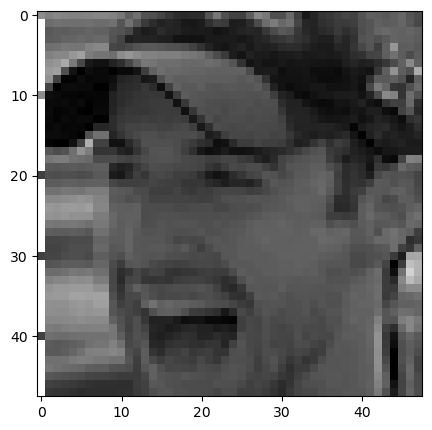

1/1 [==============================] - 0s 122ms/step
Predicted 4


In [53]:
# make a prediction for a new image.
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt
# load and prepare the image
def load_image(filename):
# load the image
    img = load_img(filename, grayscale=True, target_size=(48, 48))
    plt.figure(figsize=(5,5))
    plt.imshow(img,cmap='gray')
    plt.show()
# convert to array
    img = img_to_array(img)
# reshape into a single sample with 1 channel
    img = img.reshape(1, 48, 48, 1)
# prepare pixel data
    img = img.astype('float64')
    img = img / 255.0
    return img
# load an image and predict the class
def run_example():
# load the image
    img = load_image(r"C:\Users\pc\Downloads\2.png")
# load model
    model = load_model(r"C:\Users\pc\Downloads\emotion_detection_model.h5")
# predict the class
    predict_value = model.predict(img)
    digit = argmax(predict_value)
    print('Predicted',digit)
# entry point, run the example
run_example()